In [10]:
import pandas as pd

import sys
sys.path.append('/Users/cbulacan/cbula-git/kaggle')

from local_libs.viz import CoverageVisualizer
from local_libs.framework import CoverageAreaAnalyzer

COMPREHENSIVE COVERAGE AREA MAXIMIZATION ANALYSIS

FRAME 5 ANALYSIS

Offensive Advantage Score: 0.306
Route Synergy Score: 0.377

Most Burdened Defenders:
  - Cameron Sutton: 0.71 burden score
  - Kerby Joseph: 0.56 burden score
  - Alex Anzalone: 0.52 burden score

FRAME 10 ANALYSIS

Offensive Advantage Score: 0.527
Route Synergy Score: 0.462

Most Stressed Zones:
  - flat_right: 1.82x stress
  - flat_left: 1.62x stress

Most Burdened Defenders:
  - Cameron Sutton: 0.73 burden score

FRAME 15 ANALYSIS

Offensive Advantage Score: 0.601
Route Synergy Score: 0.562

Most Stressed Zones:
  - flat_left: 1.90x stress
  - deep_middle: 1.87x stress
  - middle_hole: 1.35x stress

Most Burdened Defenders:
  - Cameron Sutton: 0.54 burden score

FRAME 20 ANALYSIS

Offensive Advantage Score: 0.608
Route Synergy Score: 0.606

Most Stressed Zones:
  - deep_middle: 4.84x stress
  - middle_hole: 1.97x stress
  - flat_left: 1.47x stress

Most Burdened Defenders:
  - Cameron Sutton: 0.51 burden score

Cr

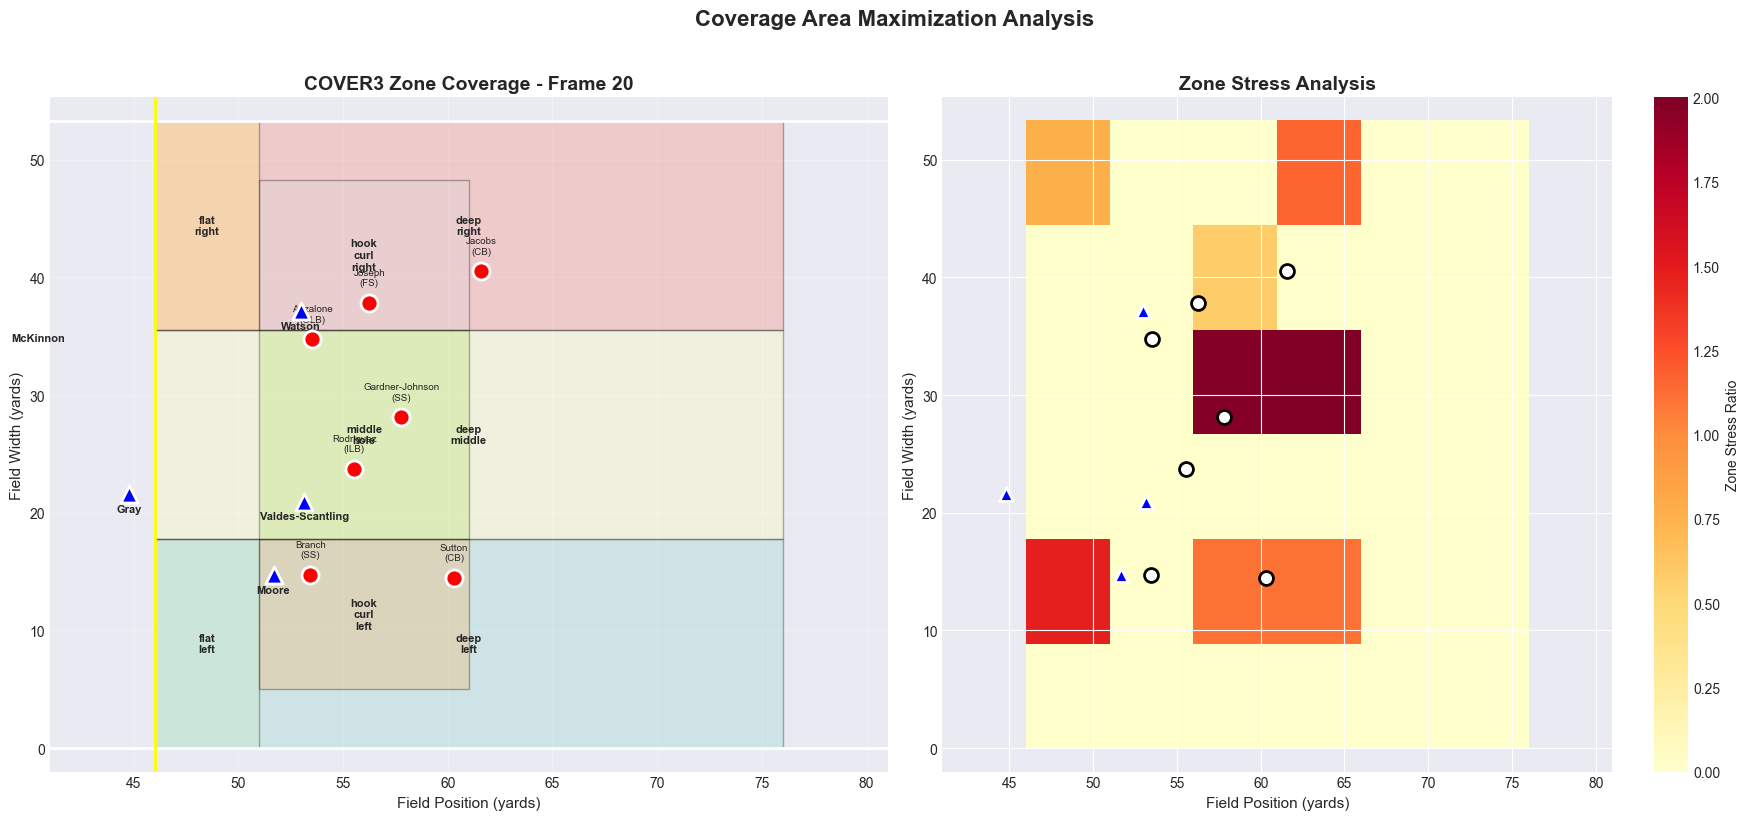

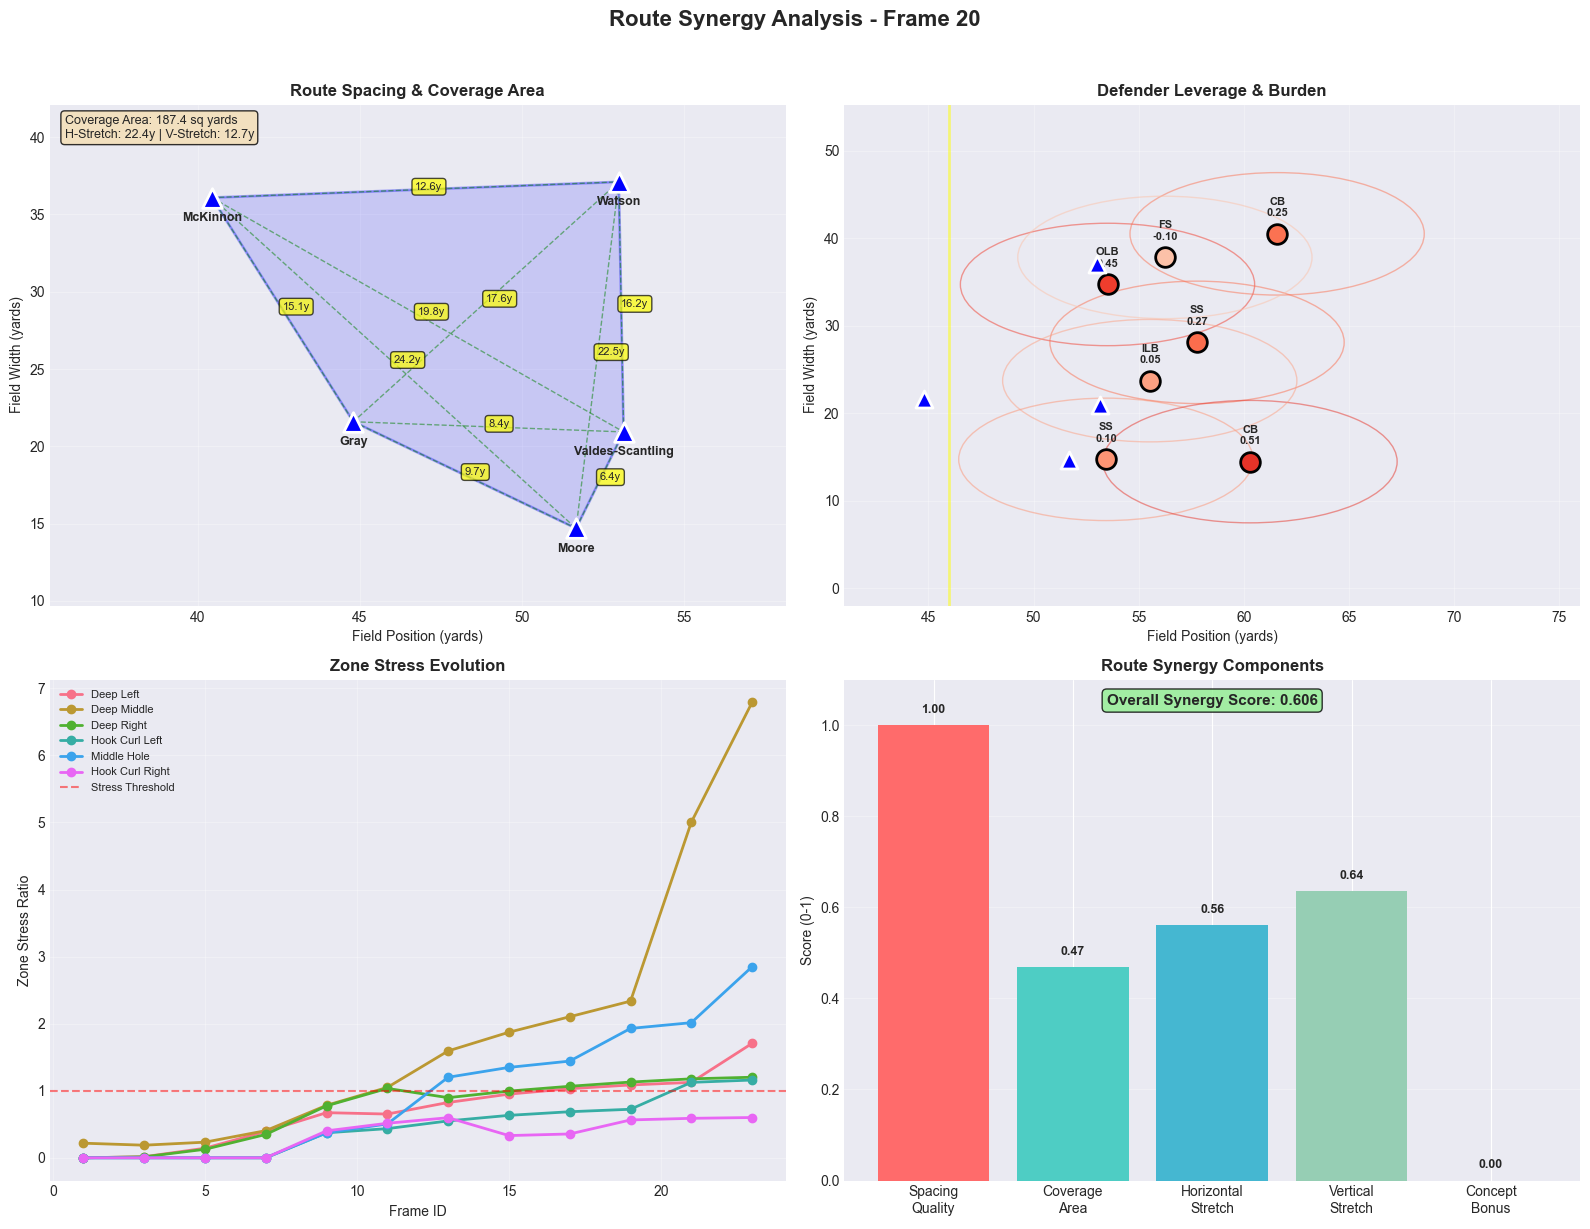

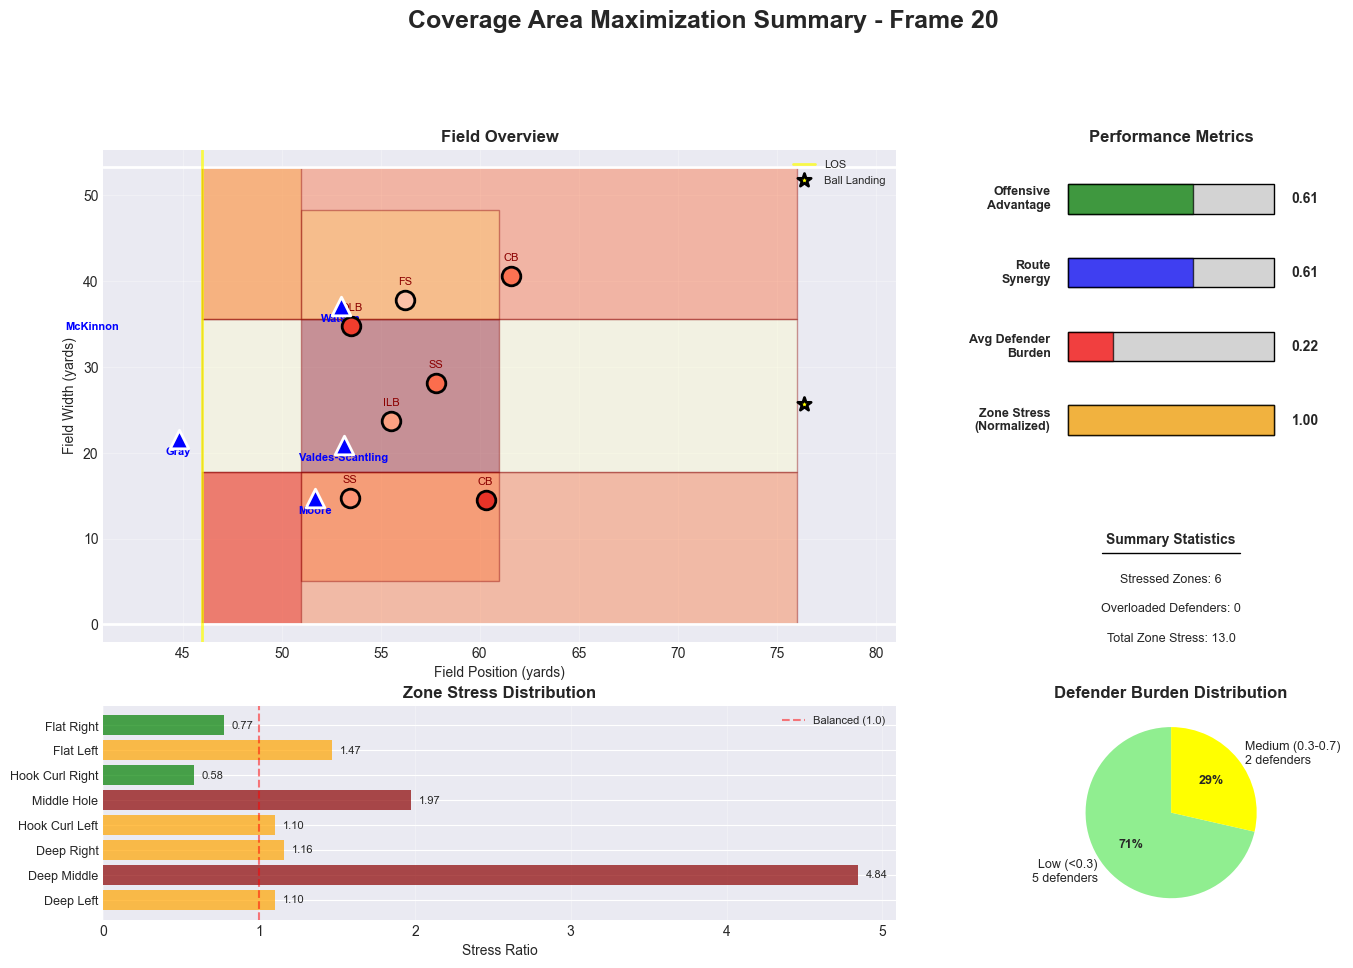

In [13]:
frame_id = 20

def run_comprehensive_analysis():
    """Run complete analysis with visualizations"""
    
    print("=" * 80)
    print("COMPREHENSIVE COVERAGE AREA MAXIMIZATION ANALYSIS")
    print("=" * 80)
    
    # Load data
    df = pd.read_csv('/Users/cbulacan/cbula-git/kaggle/notebook/sample_play_data.csv', index_col=0)
    
    # Initialize analyzer and visualizer
    analyzer = CoverageAreaAnalyzer(df)
    visualizer = CoverageVisualizer(analyzer)
    
    # Analyze key frames
    key_frames = [5, 10, 15, 20]  # Early, developing, mid, late route
    
    for frame in key_frames:
        print(f"\n{'='*40}")
        print(f"FRAME {frame} ANALYSIS")
        print(f"{'='*40}")
        
        # Get analysis results
        results = analyzer.analyze_full_play(frame, 'cover3')
        
        # Print key findings
        print(f"\nOffensive Advantage Score: {results['offensive_advantage']:.3f}")
        print(f"Route Synergy Score: {results['summary']['synergy_score']:.3f}")
        
        # Identify most stressed zones
        stressed_zones = [(name, data['stress_ratio']) 
                         for name, data in results['zone_stress'].items() 
                         if data['stress_ratio'] > 1]
        
        if stressed_zones:
            print(f"\nMost Stressed Zones:")
            for zone, ratio in sorted(stressed_zones, key=lambda x: x[1], reverse=True)[:3]:
                print(f"  - {zone}: {ratio:.2f}x stress")
        
        # Identify most burdened defenders
        burdened = [(data['defender'], data['burden_score']) 
                   for data in results['defender_burdens'].values() 
                   if data['burden_score'] > 0.5]
        
        if burdened:
            print(f"\nMost Burdened Defenders:")
            for defender, score in sorted(burdened, key=lambda x: x[1], reverse=True)[:3]:
                print(f"  - {defender}: {score:.2f} burden score")
    
    # Create visualizations for frame 15 (mid-play)
    print("\n" + "="*80)
    print("Creating visualizations for Frame 15...")
    
    # Zone coverage map
    fig1 = visualizer.plot_zone_coverage_map(frame_id, 'cover3')
    # fig1.savefig('/mnt/user-data/outputs/zone_coverage_analysis.png', dpi=150, bbox_inches='tight')
    
    # Route synergy analysis
    fig2 = visualizer.plot_route_synergy_analysis(frame_id)
    # fig2.savefig('/mnt/user-data/outputs/route_synergy_analysis.png', dpi=150, bbox_inches='tight')
    
    # Comprehensive summary
    fig3 = visualizer.create_summary_report(frame_id)
    # fig3.savefig('/mnt/user-data/outputs/coverage_maximization_summary.png', dpi=150, bbox_inches='tight')
    
    print("Visualizations saved to /mnt/user-data/outputs/")
    
    return analyzer, visualizer


if __name__ == "__main__":
    analyzer, visualizer = run_comprehensive_analysis()
    print("\n" + "="*80)
    print("Analysis complete!")